In [1]:
import numpy as np
from matplotlib import pyplot as plt

import sys
sys.path.append('../')
from wavelets import *

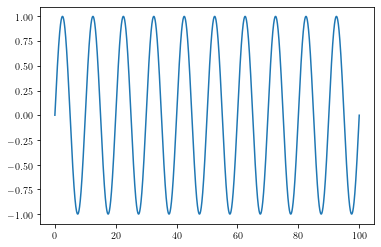

In [2]:
#Let's simulate some data, starting with a sin wave with a frequency of 0.1, amplitude of 1, observed over 100 days

frequency1 = 0.1
amp1 = 1.0
baseline = 100.0


t_mod = np.linspace(0,baseline,10000)
mod = amp1*np.sin(2*np.pi*frequency1*t_mod)

plt.plot(t_mod,mod)

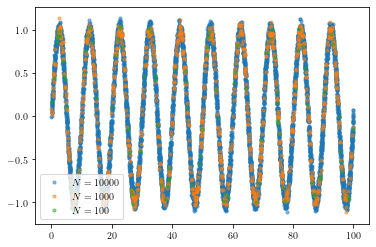

In [4]:
#Let's randomly sample that sin wave with different numbers of observations, adding in noise at 5% of the amplitude

N_obs = [10000,1000,100]
for N in N_obs:
    
    """t_obs = np.random.uniform(high=baseline,size=N)
    t_obs.sort()
    
    f_obs = amp1*np.sin(2*np.pi*frequency1*t_obs)
    
    f_obs += 0.05*amp1*np.random.randn(N)""" #already generated data
    t_obs, f_obs = np.genfromtxt(f'one_sin_0p05_noise_{N}_obs.txt', unpack=True)
    
    plt.scatter(t_obs,f_obs,s=10,alpha=0.5,label=f'$N={N}$')
    #np.savetxt(f'one_sin_0p05_noise_{N}_obs.txt',np.array([t_obs,f_obs]).T)
plt.legend(loc='lower left')

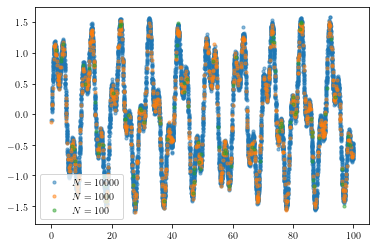

In [5]:
#Let's also add a second frequency component with 1/2 amplitude, a frequency of 1/pi, and a phase difference of 0.2 radian.

amp2 = 0.5*amp1
frequency2 = 1/np.pi
delta_phase = 0.2

N_obs = [10000,1000,100]

for N in N_obs:
    
    """t_obs = np.random.uniform(high=baseline,size=N)
    t_obs.sort()
    
    f_obs = amp1*np.sin(2*np.pi*frequency1*t_obs)
    f_obs += amp2*np.sin(2*np.pi*frequency2*t_obs - delta_phase)
    
    f_obs += 0.05*amp1*np.random.randn(N)""" #already generated data
    t_obs, f_obs = np.genfromtxt(f'two_sin_0p05_noise_{N}_obs.txt', unpack=True)
    
    plt.scatter(t_obs,f_obs,s=10,alpha=0.5,label=f'$N={N}$')
    #np.savetxt(f'two_sin_0p05_noise_{N}_obs.txt',np.array([t_obs,f_obs]).T)
plt.legend(loc='lower left')

In [7]:
import time
from tqdm.notebook import tqdm

nu_lo = 1/20
nu_hi = 1

log_omega_lo = np.log2(2*np.pi*nu_lo)
log_omega_hi = np.log2(2*np.pi*nu_hi)

omegas = np.logspace(log_omega_lo, log_omega_hi, 50, base=2)
taus = np.linspace(0, baseline, 100)

func_list = [phi_1,phi_2,phi_3]
f1 = phi_1

two_sin_times = []
one_sin_times = []

for N in tqdm(N_obs):
    t_obs, f_obs = np.genfromtxt(f'one_sin_0p05_noise_{N}_obs.txt', unpack=True)
    tic = time.perf_counter()
    transform = np.array([[WWZ(func_list,f1,f_obs,t_obs,omega,tau) for tau in taus] for omega in omegas])
    wwz1 = transform[:,:,0].T
    wwa1 = transform[:,:,1].T
    np.savetxt(f'one_sin_{N}_obs_wwz.txt', wwz1)
    np.savetxt(f'one_sin_{N}_obs_wwa.txt', wwa1)
    toc = time.perf_counter()
    one_sin_times.append(toc-tic)
    
    t_obs, f_obs = np.genfromtxt(f'two_sin_0p05_noise_{N}_obs.txt', unpack=True)
    tic = time.perf_counter()
    transform = np.array([[WWZ(func_list,f1,f_obs,t_obs,omega,tau) for tau in taus] for omega in omegas])
    wwz2 = transform[:,:,0].T
    wwa2 = transform[:,:,1].T
    np.savetxt(f'two_sin_{N}_obs_wwz.txt', wwz2)
    np.savetxt(f'two_sin_{N}_obs_wwa.txt', wwa2)
    toc = time.perf_counter()
    two_sin_times.append(toc-tic)

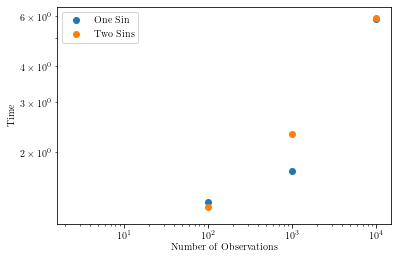

In [13]:
plt.scatter(N_obs, one_sin_times, label='One Sin')
plt.scatter(N_obs, two_sin_times, label='Two Sins')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Number of Observations')
plt.ylabel('Time')
plt.legend()